In [ ]:
"""
A large beverage distributor is trying to use big data analytics approach to access the quality of wine.
My tasks is to train an algorithm for assessment of the wines using the given dataset.
"""

In [1]:
import pandas as pd
import numpy as np
#import textstat
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [2]:
# Q1 prepare for data analysis
df = pd.read_csv('/Users/jiawenwang/Desktop/winequality-white.csv', delimiter=';')

In [3]:
# Check the null values and the result shows that there are no null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

/Users/jiawenwang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

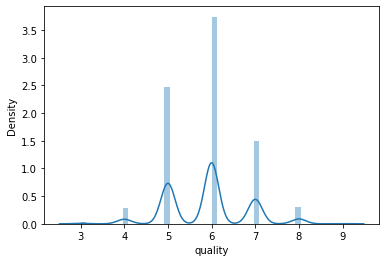

In [4]:
# Distribution of outcome variables and decide if data set should be transformed
# Original data is well ditributed 
sns.distplot(df['quality'])

In [5]:
# Q2 Baseline result
# Define outcome and predictors
y = df['quality']
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
         'total sulfur dioxide','density','pH','sulphates','alcohol']]
# Split data into training (70%) and validation sets (30%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_val)
# Calculate RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error: 0.7797679548206534


In [6]:
# Calculating the mean of quality
df['quality'].mean()

5.87790935075541

In [7]:
"""
Brief conclusion
The 10% of the mean is 5.88 is 0.588 which is smaller than the value of RMSE, and hence the model is inaccurate.
"""


'\nBrief conclusion\nThe 10% of the mean is 5.88 is 0.588 which is smaller than the value of RMSE, and hence the model is inaccurate.\n'

In [8]:
# Q3
# 3.1 Standardize predictors
from sklearn.preprocessing import StandardScaler 

In [9]:
# Standardize predictors
y = df['quality']
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
         'total sulfur dioxide','density','pH','sulphates','alcohol']]
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [10]:
# Re-run the model and obtain RMSE
regressor2 = LinearRegression() 
regressor2.fit(X_train, y_train)
y_pred = regressor2.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error: 0.779767954820652


In [11]:
"""
Brief conclusion
The value of RMSE do down a little bit.
The 10% of the mean is 5.88 is 0.588 which is smaller than the new value of RMSE, and hence the model is still inaccurate.
"""


'\nBrief conclusion\nThe value of RMSE do down a little bit.\nThe 10% of the mean is 5.88 is 0.588 which is smaller than the new value of RMSE, and hence the model is still inaccurate.\n'

In [12]:
#check multicollinearity
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


<AxesSubplot:>

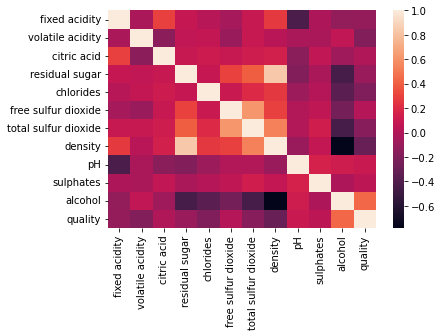

In [13]:
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

In [14]:
# The above heatmap shows a high collinearity between density and residual sugar

In [15]:
# re-run the model after removing density and residual sugar
y = df['quality']
X = df[['fixed acidity','volatile acidity','citric acid','chlorides','free sulfur dioxide',
         'total sulfur dioxide','pH','sulphates','alcohol']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

regressor3 = LinearRegression() 
regressor3.fit(X_train, y_train)
y_pred = regressor3.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error: 0.7896602787538


In [16]:
"""
Conclusion
It seems like the new RMSE gets large and therefore the model doesn't been imporved but gets worse. 
Therefore, it is better to retain the two variables.
"""

"\nConclusion\nIt seems like the new RMSE gets large and therefore the model doesn't been imporved but gets worse. \nTherefore, it is better to retain the two variables.\n"

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

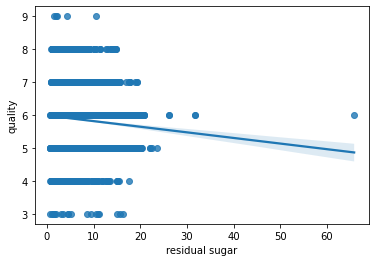

In [17]:
# Q3.3 Three features – residual sugar, free sulfur dioxide, and density – have noticeable outliers. Use 
# scatter plots to identify those and exclude them from the dataset 
sns.regplot(x=df['residual sugar'], y=df['quality'])

In [18]:
df_out = df[df['residual sugar'] < 60]

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

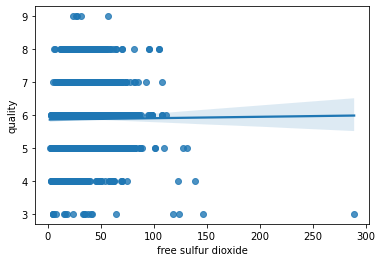

In [19]:
sns.regplot(x=df['free sulfur dioxide'], y=df['quality'])

In [20]:
df_out = df[df['free sulfur dioxide'] <250]

<AxesSubplot:xlabel='density', ylabel='quality'>

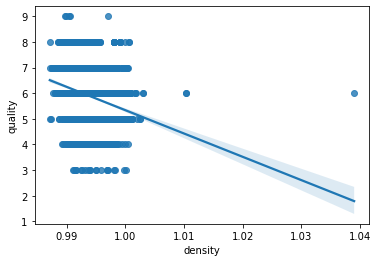

In [21]:
sns.regplot(x=df['density'], y=df['quality'])

In [22]:
df_out = df[df['density'] <1.02]

In [23]:
y = df_out['quality']
X = df_out[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
         'total sulfur dioxide','density','pH','sulphates','alcohol']]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

regressor4 = LinearRegression() 
regressor4.fit(X_train, y_train)
y_pred = regressor4.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error: 0.7525259026997893


In [24]:
# The new RMSE goes down by 0.03, which means prediction accuracy is proved

In [25]:
# Q3.4 Run a KNN model with number of neighbors equal to 5. Provide a brief statement if using KNN 
# model improves my prediction accuracy.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [26]:
y = df_out['quality']
X = df_out[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
         'total sulfur dioxide','density','pH','sulphates','alcohol']]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

knn_reg = KNeighborsRegressor(n_neighbors = 5)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error: 0.71692844451718


In [27]:
"""
Conclusion：
Although the new RMSE is still greater than 10% of the mean of outcome quality, the new RMSE decreased by about 0.03.
Therefore, the accuracy of the prediction increases.
"""

'\nConclusion：\nAlthough the new RMSE is still greater than 10% of the mean of outcome quality, the new RMSE decreased by about 0.03.\nTherefore, the accuracy of the prediction increases.\n'

In [28]:
# Q3.5 Run appropriate code to determine the optimal value for k using a range from 2 to 22.
k_range = range(2, 22)
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    scores.append(np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print(scores)

[0.7373652303934579, 0.7253117243679912, 0.7200658983448555, 0.71692844451718, 0.7117813239058921, 0.7070184241316778, 0.7070992651306458, 0.7097445296640834, 0.7123306577611233, 0.7148364661437158, 0.7150855310411892, 0.7168031153074033, 0.7171855616275503, 0.71855233651938, 0.7192905021829583, 0.7194851132839214, 0.722434412692003, 0.7244976387383945, 0.7252550571758763, 0.7250979530452983]


In [29]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Testing Accuracy (RMSE)')

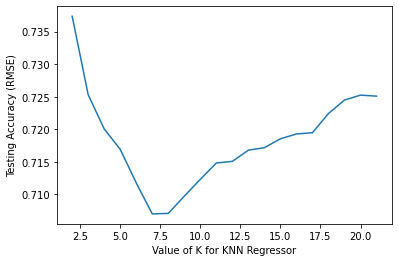

In [30]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN Regressor')
plt.ylabel('Testing Accuracy (RMSE)') 

In [31]:
# The optimal value of K is 7. 

In [32]:
# Q3.6 Re-run KNN model with the “optimal” number of neighbors value. Provide a brief statement if prediction accuracy improves.
knn_reg = KNeighborsRegressor(n_neighbors = 7)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error: 0.7070184241316778


In [33]:
"""
Conclusion:
The new RMSE decreases again, which means the accuracy of prediction is also improved. 
"""

'\nConclusion:\nThe new RMSE decreases again, which means the accuracy of prediction is also improved. \n'

In [34]:
# Q3.7 import the library to run a Support Vector Regressor (SVR) model
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [35]:
# Q3.8  run a Grid Search for SVR mode
param_grid ={'kernel' : ('poly', 'rbf'),'C' : (1,2,3),'gamma' : ('auto','scale')}

In [36]:
modelsvr = SVR()

In [37]:
grid_search = GridSearchCV(modelsvr, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)

In [38]:
y = df_out['quality']
X = df_out[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
         'total sulfur dioxide','density','pH','sulphates','alcohol']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': (1, 2, 3), 'gamma': ('auto', 'scale'),
                         'kernel': ('poly', 'rbf')},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [39]:
grid_search.best_params_

{'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [40]:
# Q3.9 use the “best” parameters suggested by GridSearchCV, re-run your SVR model. Provide a 
# brief statement if using SVR with parameterization suggested by GridSearchCV improves the 
# prediction accuracy.

In [41]:
y = df_out['quality']
X = df_out[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
         'total sulfur dioxide','density','pH','sulphates','alcohol']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
modelsvr = SVR(C=2, gamma='scale', kernel='rbf')
modelsvr.fit(X_train, y_train)
y_pred = modelsvr.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error: 0.694333711391061


In [42]:
# Q3.10 
#using 5-fold cross validation, run the “best” performing model using appropriate scoring 
# and make a conclusion if the model trains equally well on different randomly drawn datasets or there is variance bias present. 

# It seems like SVR model gives the optimal performance
from sklearn.model_selection import cross_val_score

In [43]:
all_accuracies = cross_val_score(estimator=modelsvr, X=X_train, y=y_train, cv=5, scoring='neg_root_mean_squared_error')
print(all_accuracies) 
print(all_accuracies.mean()) 
print(all_accuracies.std()) 


[-0.69695899 -0.68785981 -0.69239485 -0.72184029 -0.67421503]
-0.694653796624453
0.015578341736899776


In [44]:
# Conclusion
# With the low value of standard deviation, we can conclude the model performs consistenlty.